## Question 3 Patient Charges - Clustering

In machine learning too, we often group examples as a first step to understand a subject (data set) in a machine learning system. Grouping unlabeled examples is called clustering. As the examples are unlabeled, clustering relies on unsupervised machine learning.

## Team Members
Dhrish S Kumar - E0320008<br>
A Ch Rohit - E0320022<br><br>
Dataset - Patient Charges Clustering

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd


# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


**Reading the file and printing the top 5 columns**

In [2]:

#Reading Csv File
df=pd.read_csv("insurance.csv")

#Top 5 Rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Storing the orginal dataframe in another variable
original_df = df.copy()

## Data cleaning and Data preparation

In [28]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

## Build clusters using K-means; choose K=3, metric as Eucledian.

In [5]:
X = df[["bmi", "charges"]]
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)

KMeans(n_clusters=3)

In [6]:
# Printing the Centroids
print(kmeans.cluster_centers_)

[[2.90733333e+01 1.86465264e+04]
 [3.04345491e+01 6.34535967e+03]
 [3.48454321e+01 4.07613086e+04]]


In [7]:
#t receives a label as the index of the cluster it gets assigned to. We can see these labels: y_pred. array([4, 0, 1, ..., 2, 1, 0], dtype=int32)y_pred is kmeans.labels_ True.
print(kmeans.labels_)

[0 1 1 ... 1 1 0]


 Explaining the Elbow Method:
The elbow method finds the average sum of squares distance between the cluster centroid and the data observations. As the number of cluster increases the average sum of squares decreases. Basically, as the number of clusters increases, the distance between the data points and the centroids decreases as well. Whenever, we see the "elbow" that is a rule of thumb to consider the optimal number of clusters. 

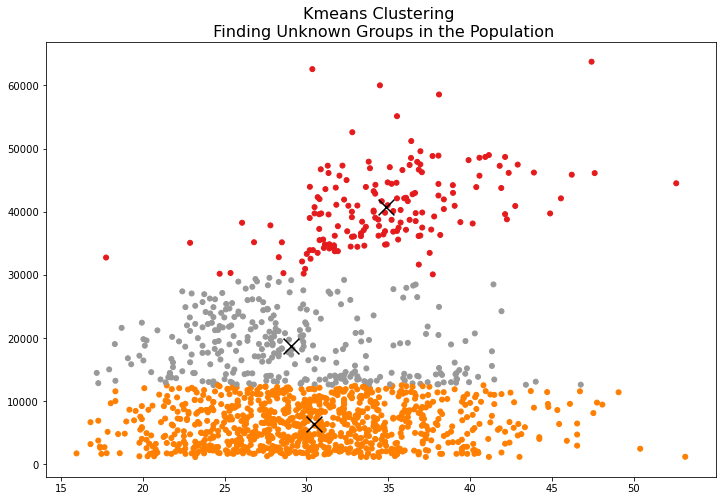

In [8]:
import sklearn.cluster as KMeans
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

## Print the optimal k value and within cluster SSE for that k value

C:\Users\Rohit Anand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


1 : 196074271288.56775
2 : 48014969101.122986
3 : 22958613268.22045
4 : 12124777274.518297
5 : 8540496641.444865
6 : 6167798545.289857
7 : 4434619533.806842
8 : 3496462584.3295546
9 : 2776483573.644193
10 : 2259108759.1467156
11 : 1841948151.3900037
12 : 1496421554.6398735
13 : 1281508793.1142607
14 : 1099543460.3421926


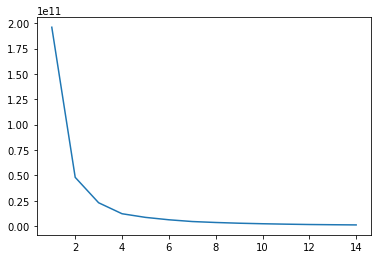

In [14]:
from sklearn.cluster  import KMeans
# ELBOW METHOD
a=[]
for i in range(1,15):
    kmeans=KMeans(i)
    kmeans.fit(X)
    a.append(kmeans.inertia_)
    print(i,":",kmeans.inertia_)
plt.plot(range(1,15),a)
plt.show()


In [15]:
kmeans=KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [16]:
pred=kmeans.fit_predict(X)
pred

array([2, 0, 0, ..., 0, 0, 2])

## Build clusters using agglomerative clustering for the random 10 datapoints of that dataset and display dendrogram tree

In [20]:
# Hierarchial CLustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,LabelEncoder
df1=df[:10]

In [22]:
le=LabelEncoder()
columns=['sex','smoker','region']
for col in columns:
    df1[col]=le.fit_transform(df1[col])
df1

<ipython-input-22-e9b5083998eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=le.fit_transform(df1[col])


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_x=ss.fit_transform(df1)
scaled_x=pd.DataFrame(scaled_x,columns=df1.columns)

**Agglomerative Clustering**

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster

AgglomerativeClustering(n_clusters=3)

In [25]:
y=cluster.fit_predict(scaled_x)
y

array([2, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

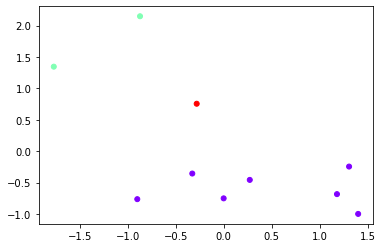

In [26]:
plt.scatter(scaled_x['bmi'], scaled_x['charges'], c=y, cmap="rainbow", s=25)

**Dendrogram**

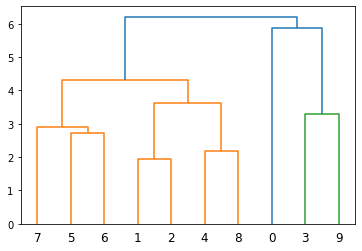

In [27]:
import scipy.cluster.hierarchy as shc
dend=shc.dendrogram(shc.linkage(scaled_x,method='ward'))